# Step #1 Loading the Data

In [11]:
# Work in progress!
# A tutorial for this file will soon be available at www.relataly.com
# Tested with Python 3.8.8, Matplotlib 3.5, Scikit-learn 0.24.1, Seaborn 0.11.1, numpy 1.19.5, plotly 4.1.1, cufflinks 0.17.3

import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as col 
import matplotlib.cm as cm 
import numpy as np 
from math import log, exp 
from datetime import date, timedelta, datetime
import seaborn as sns
import plotly.graph_objects as go
from plotly.graph_objs import *
sns.set_style('white', {'axes.spines.right': False, 'axes.spines.top': False})
from datetime import datetime
from scipy.stats import norm
import cufflinks as cf
plt.style.use('white')

# Setting the timeframe for the data extraction
end_date =  date.today().strftime("%Y-%m-%d")
start_date = '2010-01-01'

# Getting NASDAQ quotes
stockname = 'Microsoft'
symbol = 'MSFT'

# You can either use webreader or yfinance to load the data from yahoo finance
# import pandas_datareader as webreader
# df = webreader.DataReader(symbol, start=start_date, end=end_date, data_source="yahoo")

import yfinance as yf #Alternative package if webreader does not work: pip install yfinance
df = yf.download(symbol, start=start_date, end=end_date)

# Quick overview of dataset
df.head()

OSError: 'white' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [9]:
df["Close"].iplot(asFigure=True, color = "blue", layout=Layout(title = 'Microsoft Price Chart'))

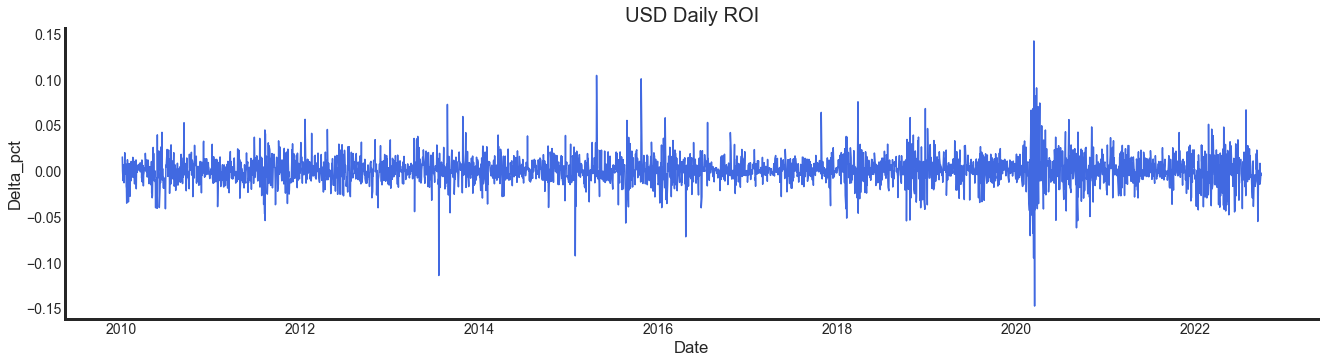

In [12]:
# Plot histograms
fig, ax = plt.subplots(figsize=(20,5))
c_close = 'Close'
c_open = 'Open'
df['Delta_pct'] = df[c_close].pct_change()

#palette = sns.color_palette("mako_r", df_delta_p.shape[1])
sns.lineplot(data=df['Delta_pct'] , linewidth = 1.5, color='royalblue')
plt.title('USD Daily ROI')
plt.show()

In [ ]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot()
plt.show()
# summarize the daily returns
stock_returns.describe()

In [ ]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean(axis=0, skipna=True)

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Return Difference')
plt.show()

In [ ]:
# calculate the standard deviations
sd_excess_return = excess_returns.std(axis=0, skipna=True)

# plot the standard deviations
sd_excess_return.plot.bar(title='Standard Deviation of the Return')
plt.show()

In [ ]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ration: Stocks vs S&P 500')
plt.show()

In [262]:
import plotly
fig, ax = plt.subplots(figsize=(20,5))
sns.despine()
sns.histplot(df_roi[f'{coinname}_delta_p'].dropna(), color='royalblue', ax=ax)
ax.set_xlim(df_roi[f'{coinname}_delta_p'].quantile(0.005), df_roi[f'{coinname}_delta_p'].quantile(0.995))
plotly_fig = plotly.tools.mpl_to_plotly(fig)
plotly_fig['layout'].update(title = "Return Distribution",
                            paper_bgcolor = 'white',
                            xaxis = dict(showgrid=True),
                            width = 1000,
                            height = 450)
plotly_fig

In [260]:
# The 0.05 empirical quantile of daily returns
var_5_quant = round(df_roi[f'{coinname}_delta_p'].quantile(0.05), 3)
print(var_5_quant)

# the percent value of the 5th quantile
var_5_perc = "{:.1f}%".format(-var_5_quant*100)
print(var_5_perc)

# Value at Risk for a 1,000 $ investment
var_one_mil = "${}".format(int(-var_5_quant * 1000))
print(var_one_mil)

-0.062
6.2%
$62


# #8 Risk of a 10% Drop

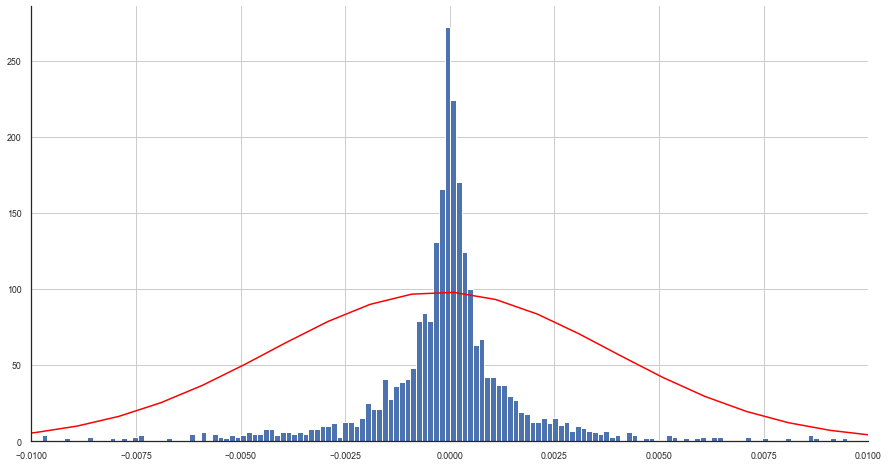

In [211]:
# Questions
# What is the probability of a 10% drop in price?

coinname = 'ETH'

# Plot histograms
c_close = f'{coinname}_Close'
c_open = f'{coinname}_Open'
df_roi = df_crypto[[c_close, c_open]].copy()
df_roi[f'{coinname}_delta_p'] = (df_roi[c_close] - df_roi[c_open]) / df_roi[c_open] * 100

df_roi['LogReturn'] = np.log(df_roi[c_close]).shift(-1) - np.log(df_roi[c_open])
mu = df_roi['LogReturn'].mean()
sigma = df_roi['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(df_roi['LogReturn'].min()-0.01, df_roi['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

df_roi['LogReturn'].hist(bins=1000, figsize=(15, 8))
plt.xlim(-0.01, 0.01)
plt.plot(density['x'], density['pdf'], color='red')